# Project Desription
#### PROBLEM STATEMENT <i>(according to the data provider on Kaggle)</i>     

"The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period."  

**Attribute Information: <i>(according to the data provider on Kaggle)</i>**  
The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.
"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

##### GOAL OF THE PROJECT    

We are required to model the shopper's behavior based on different attribtes, and then predict the outcome of those behavior, on the basis that revenue will be generated or not as a result of that kind of behavior.  

##### DATA SOURCE  
As stated on the data description, source of the data is as follows - 
* C. Okan Sakar 
    Department of Computer Engineering, Faculty of
    Engineering and Natural Sciences, Bahcesehir University,
    34349 Besiktas, Istanbul, Turkey
* Yomi Kastro
    Inveon Information Technologies Consultancy and Trade,
    34335 Istanbul, Turkey
    
* FROM Kaggle -https://www.kaggle.com/roshansharma/online-shoppers-intention  


**Okay so prima facie, lets import some of the libraries we will be needing for this project.**  
(even if we are missing out on some library, we can always import it later on in the project.)

In [1]:
import sys

# library to handle vectorized data 
import numpy as np 

# library for data analsysis and man

import pandas as pd 
# so that the output is not trunacated by pandas when we actually want to see it 
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100000)

# for visualisations
import seaborn as sns

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt


# Loading the data.

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')
data.shape

(12330, 18)

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
# let's check the data types of the features to check for proper representation of the feature data type
data.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

According to the data source, the categorical features are as follows : 
* SpecialDay : Special days like valentine etc
* OperatingSystems : Operating system used
* Browser : Browser used
* Region : Region of the user
* TrafficType : Traffic Type
* VisitorType : Types of Visitor
* Weekend : Weekend or not
* Month : Month of the year
* Revenue : Revenue will be generated or not (TARGET FEATURE)  

Out of the above mentioned features, we can see that only 4 of them are of proper data type. So let's change the data type of the categorical features with wrong data type.

In [6]:
data['SpecialDay'] = data['SpecialDay'].astype('object')
data['OperatingSystems'] = data['OperatingSystems'].astype('object')
data['Browser'] = data['Browser'].astype('object')
data['Region'] = data['Region'].astype('object')
data['TrafficType'] = data['TrafficType'].astype('object')

In [7]:
# let's check if it is correctly implemented or not
data.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                  object
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

# EDA and data cleaning (if required).

Exploring the categorical features in our dataset, that are of data-type > 'object'.

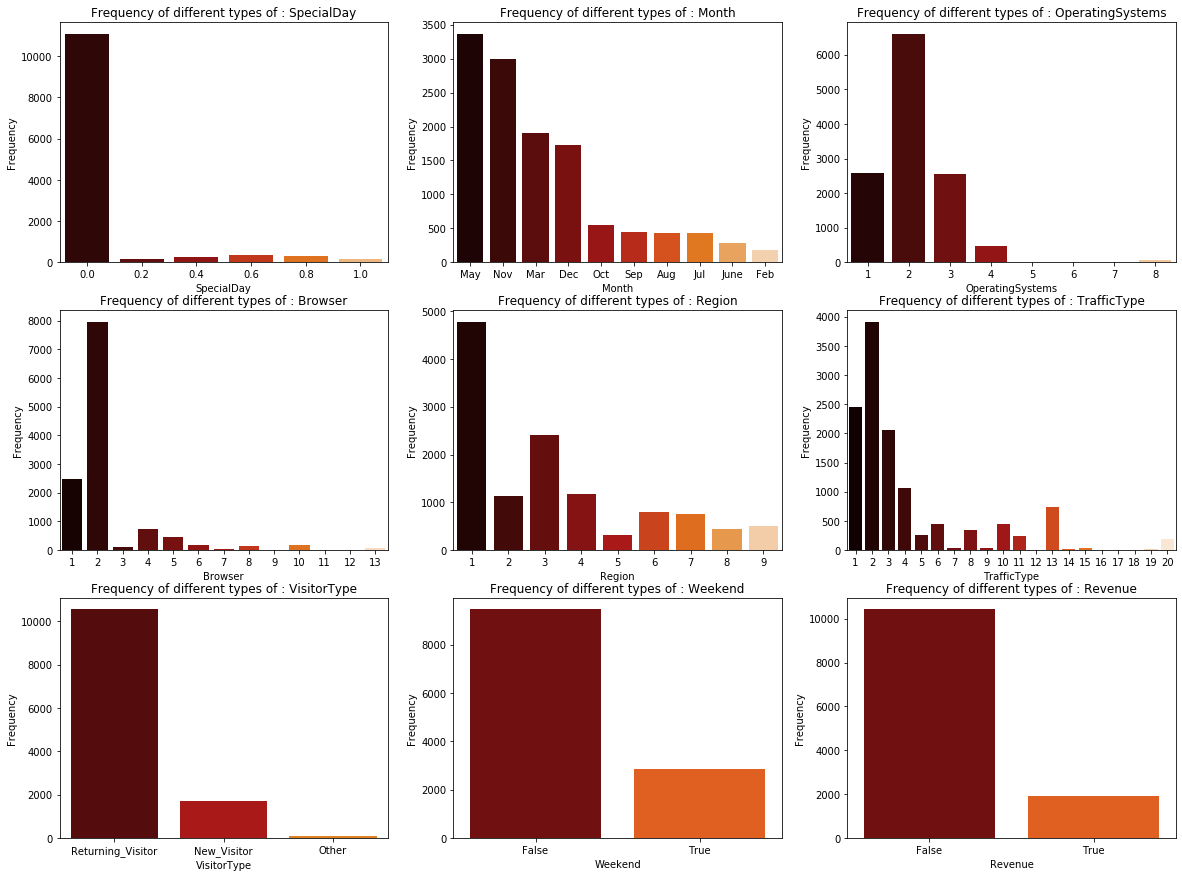

In [8]:
# visualizing the frequency distribution of the various classes in the categorical features ---
# because of the fact that we have very less number of features in our dataset, we can manually select the categorical features ---
catg_features = data.select_dtypes(include = ['object', 'bool'])
f, axes = plt.subplots(3,3, figsize=(20,15)) 
for feature, x in zip(catg_features, range(len(catg_features))) : 
    sns.barplot(x=data[feature].value_counts().index,
                y=data[feature].value_counts(),
                data=data,
                palette="gist_heat",
                ax=axes.flatten()[x])
    axes.flatten()[x].set_title('Frequency of different types of : {}'.format(feature))
    axes.flatten()[x].set_ylabel("Frequency")
    axes.flatten()[x].set_xlabel("{}".format(feature))

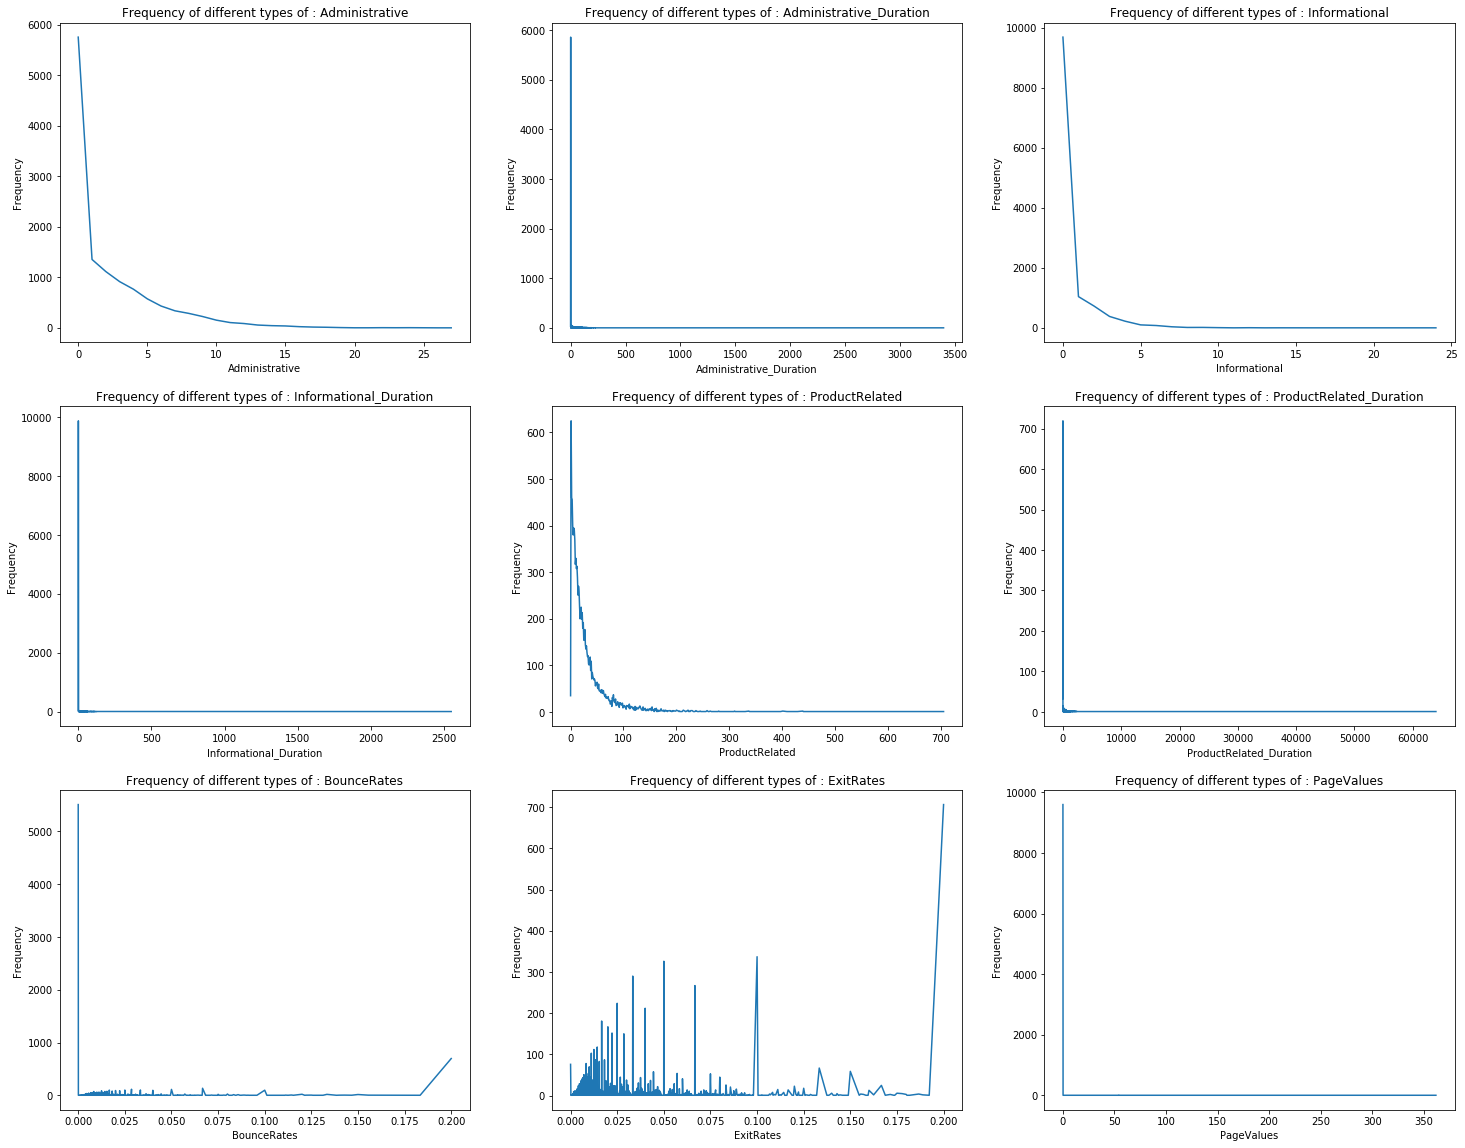

In [9]:
# visualizing the frequency distribution of the numerical features ---
num_features = data.select_dtypes(include = ['float', 'int']).columns
f, axes = plt.subplots(3,3, figsize=(25,20)) 
for feature, x in zip(num_features, range(len(num_features))) : 
    sns.lineplot(x=data[feature].value_counts().index,
                y=data[feature].value_counts(),
                data=data,
                palette="gist_heat",
                ax=axes.flatten()[x])
    axes.flatten()[x].set_title('Frequency of different types of : {}'.format(feature))
    axes.flatten()[x].set_ylabel("Frequency")
    axes.flatten()[x].set_xlabel("{}".format(feature))

# Descriptive statistical analysis

In [10]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742


As we can see from above the numerical features are on very different scales with respect to each other, this tells us that we will need to scale the numerical features in the future before using for modelling the data.

# Correlational analysis.

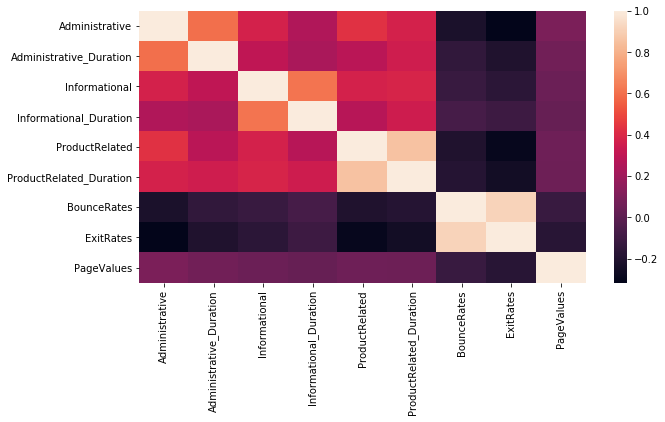

In [11]:
# Let's visualize the correlation between the features.
corr_matrix = data[num_features].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix)

From above we can observe that the features : 
* BounceRates and ExitRates are weekly correlated with the other features
* Duratonal features related to Admnistrative, Informatonal and ProdectRelated respectively, are strongly correlated.

# Handling missing values.

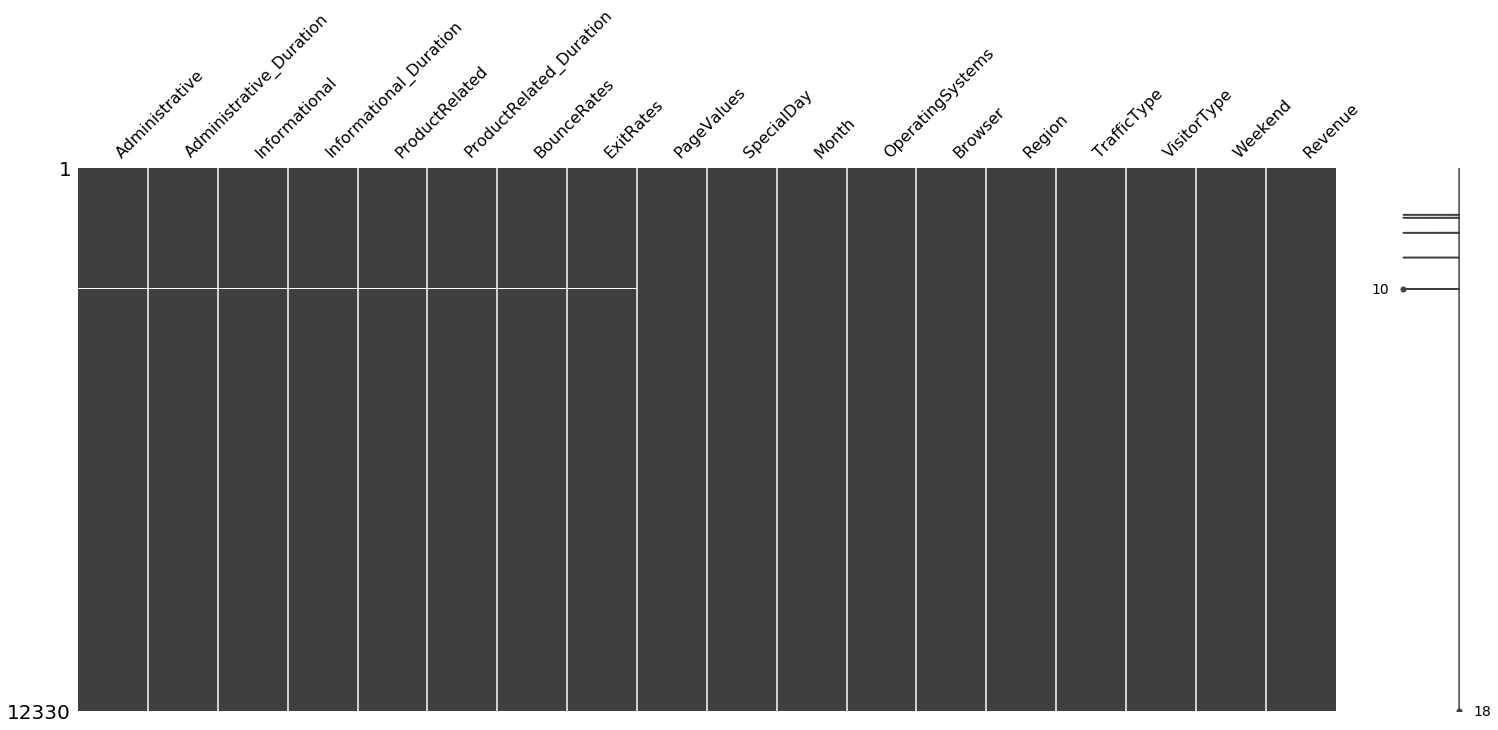

In [12]:
# let's visualize the presence of missing values in our dataset, if any ---
import missingno as msno
msno.matrix(data)

As we can see from above we do in fac have missing values in our dataset. Let's identify the features containing missing values and move forward with imputing them as well.

In [13]:
# making an empty list to contain the features which will be identifie as having null values in them ---
features_with_null=[]
for feature in data.columns:
    if data[feature].isnull().sum() != 0 :
        features_with_null.append(feature)
print(features_with_null)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates']


Observations from the above output :  
* These features although being numerical, show a pattern of human behaviour, in terms of responses and stimulii.  
      
    * 'Administrative'  
    * 'Informational'  
    * 'ProductRelated'  
    * 'BounceRates'  
    * 'ExitRates'  


 So the most efficient way of imputing the missing values in thse fatures is by using 'MODE' to replace the null values; due to the fact       that the mode-value will be representing the most-probable response to the given stimulus, defined as a feature in our case.  
    
* These features are basically responses to different stimulii but in terms of time taken to act the response; hence for the case of imputing missing values in these features, the 'MEAN' value will be most optimum in order to prevent informational loss and introduction of unwanted bias.
    * 'ProductRelated_Duration'
    * 'Informational_Duration'
    * 'Administrative_Duration'


In [14]:
import sklearn
from sklearn.impute import SimpleImputer
# mode imptation of null-values ---
for feature in ['Administrative', 'Informational', 'ProductRelated','BounceRates','ExitRates'] :
    data[feature] = SimpleImputer(strategy='most_frequent').fit_transform(data[feature].values.reshape(-1,1))
# mean imputation of null-values ---
for feature in ['ProductRelated_Duration','Informational_Duration','Administrative_Duration'] :
    data[feature] = SimpleImputer(strategy='mean').fit_transform(data[feature].values.reshape(-1,1))

In [15]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Outlier detection and removal.

Now that we have standardized our numerical feaures we can impliment the Tukey Test for outlier detection and removal in these features.

In [16]:
# utilising the method 'Outlier_detector_and_remove' in the class 'Outliers' created by us for this execution.
from Outliers import Outlier_detector_and_remover
print(Outlier_detector_and_remover.__doc__)


	This is a class for detecting and removal of utliers in a feature of a dataframe.

	Availaible methods for this class are as follows :

		* 'TUKEY_outlier_detector' >> Detection of outliers in a feature of a dataframe, utilising IQR.
		* 'TUKEY_outlier_remover' >> Removal of outliers in a feature of a dataframe, utilising IQR.
        * 'operate' >> To carry out the desired method between 'detection' and 'removal'

	Class parameters are as follows :
		* dataframe - name of the dataframe of the data in use.
		* feature - name of the feature in the dataframe, to detect and manage the outliers.
	


Outliers detection in our numerical features.

In [17]:
for feature in num_features:
    print('------------Outlier detection report for the feature > {}-------------"'.format(feature))
    Outlier_detector_and_remover(data, feature, 'detection').operate()

------------Outlier detection report for the feature > Administrative-------------"
interquartile range: 4.0
upper_inner_fence: 10.0
lower_inner_fence: -6.0
upper_outer_fence: 16.0
lower_outer_fence: -12.0
percentage of records out of inner fences for Administrative is: 3.28
percentage of records out of outer fences for Administrative is: 0.41
------------Outlier detection report for the feature > Administrative_Duration-------------"
interquartile range: 93.25625
upper_inner_fence: 233.14062499999997
lower_inner_fence: -139.88437499999998
upper_outer_fence: 373.025
lower_outer_fence: -279.76874999999995
percentage of records out of inner fences for Administrative_Duration is: 9.51
percentage of records out of outer fences for Administrative_Duration is: 4.50
------------Outlier detection report for the feature > Informational-------------"
interquartile range: 0.0
upper_inner_fence: 0.0
lower_inner_fence: 0.0
upper_outer_fence: 0.0
lower_outer_fence: 0.0
percentage of records out of i

In [18]:
# removing outliers from the outer fence of these numerical features.
for feature in num_features:
    print('------------Outlier removal report for the feature > {}-------------"'.format(feature))
    data = Outlier_detector_and_remover(data, feature, 'removal').operate()

------------Outlier removal report for the feature > Administrative-------------"
State the fence type to remove outliers relative to it :outer
length of input dataframe: 12330
length of new dataframe after outlier removal: 12279
------------Outlier removal report for the feature > Administrative_Duration-------------"
State the fence type to remove outliers relative to it :outer
length of input dataframe: 12279
length of new dataframe after outlier removal: 11737
------------Outlier removal report for the feature > Informational-------------"
State the fence type to remove outliers relative to it :outer
length of input dataframe: 11737
length of new dataframe after outlier removal: 9417
------------Outlier removal report for the feature > Informational_Duration-------------"
State the fence type to remove outliers relative to it :outer
length of input dataframe: 9417
length of new dataframe after outlier removal: 9370
------------Outlier removal report for the feature > ProductRelated

In [19]:
# let's look at the dimensions of our data after handling numerical  outliers in them.
data.shape

(6664, 18)

# Data analysis with visualization.

Visualising the relation between the categorical features and our target feature.

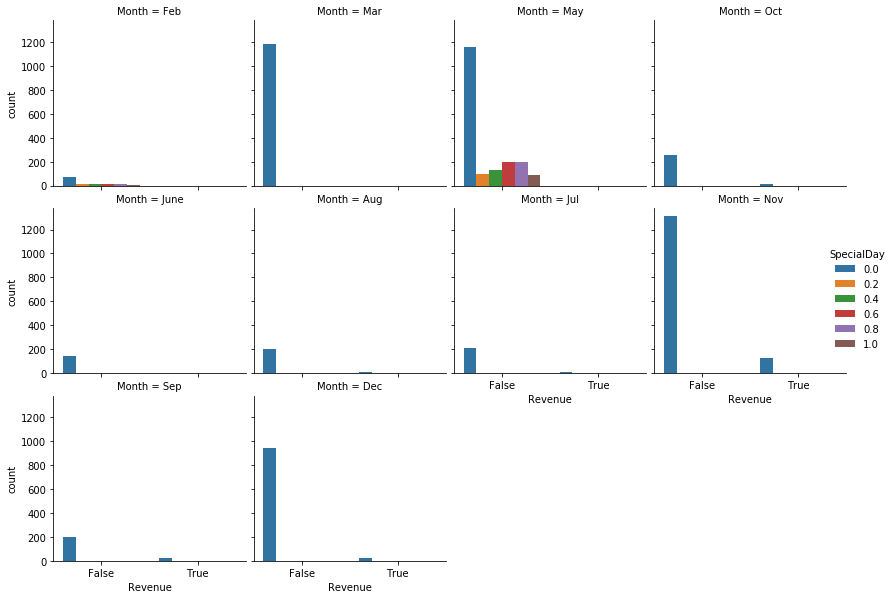

In [20]:
# let's see the relation of SpecialDay and Month with Revenue type.
plot = sns.catplot(x='Revenue', hue='SpecialDay', col='Month', data=data, kind='count', legend_out = True, col_wrap=4)
plot.fig.set_figwidth(12)
plot.fig.set_figheight(8)

We can observe that on a generalized basis, revenue is not generated as the days get closer to any special days.

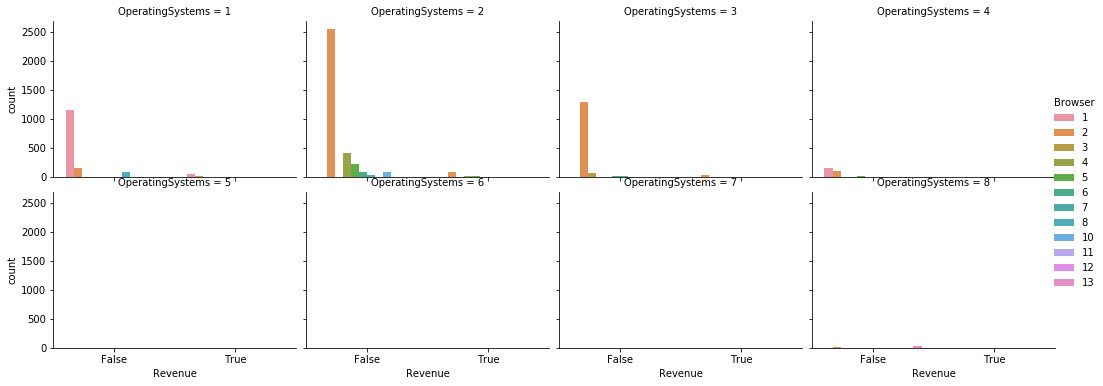

In [21]:
# let's see the relation of Browse and OperatingSystems with Revenue type.
plot = sns.catplot(x='Revenue', hue='Browser', col='OperatingSystems', data=data, kind='count', legend_out=True, col_wrap=4)
plot.fig.set_figwidth(15)
plot.fig.set_figheight(5)

We can observe that on the browsers 1,2 and on the operating systems 1,2,3 are the attributes of the scenario where revenue is not getting generated mostly.

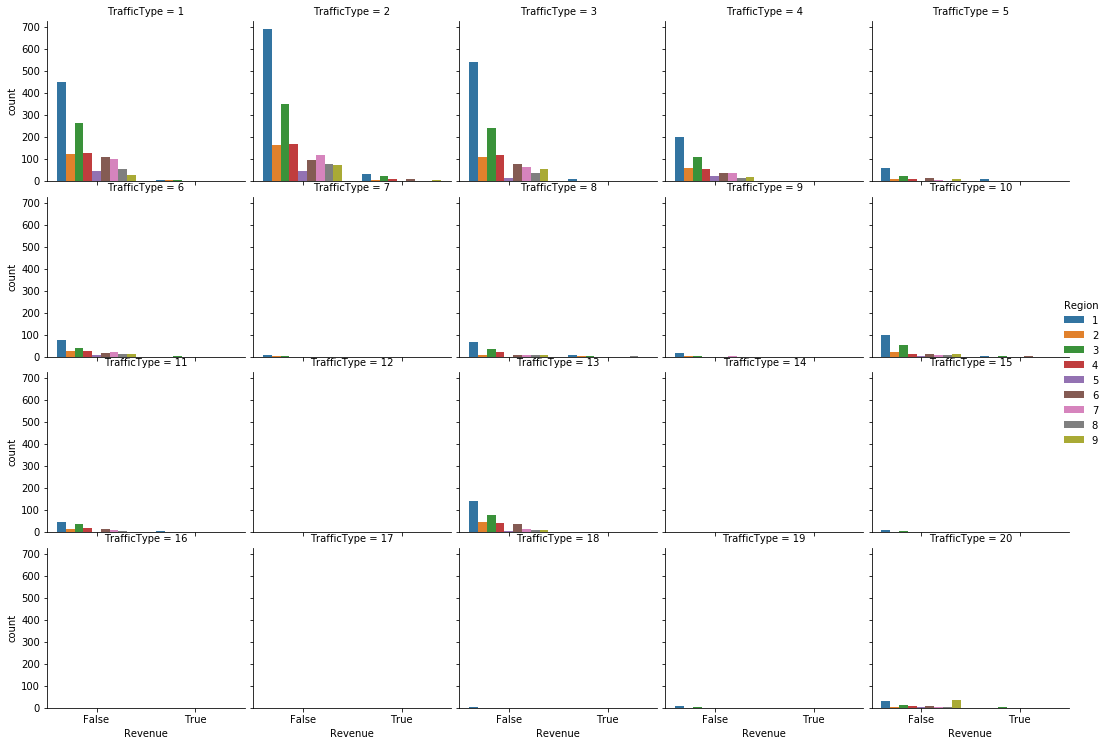

In [22]:
# let's see the relation of Region and TrafficType with Revenue type.
plot = sns.catplot(x='Revenue', hue='Region', col='TrafficType', data=data, kind='count', legend_out = True, col_wrap=5)
plot.fig.set_figwidth(15)
plot.fig.set_figheight(10)

We can observe that, for type of traffic of 1,2,3,4,11,13,15,18, revenues are not gettin ggenerated.  
We can also see that as the regions are changing from 1 10 9, the amount of revenues not getting generated is decreasing, but not necessarily incrasing as an ofset.

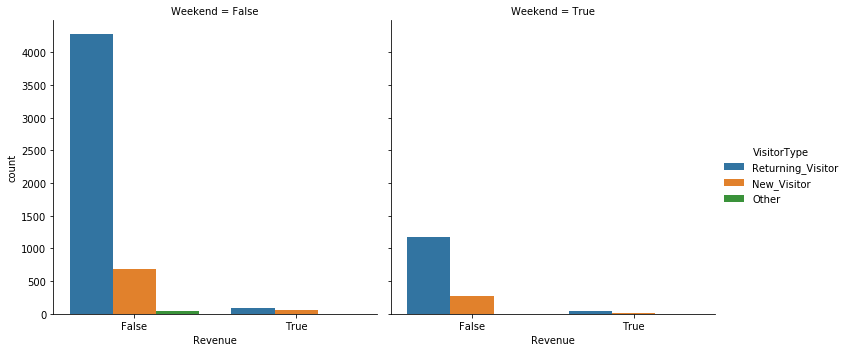

In [24]:
# let's see the relation of VisitorType and Weekend with Revenue type.
sns.catplot(x='Revenue', hue='VisitorType', col='Weekend', data=data, kind='count', legend_out = True)

We can observe that, mostly revenue generation is failing for the type of visitor who are returning visitors.